# Height&Weight Predicition

## 1.Business Problem

### 1.1 Description
It is a Classification problem.The dataset has 10000 rows and 3 columns (index,Height,Weight,Gender).

### 1.2 Sources
http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

## 2.Machine Learning Problem

### 2.1 Data
#### 2.1.1 Data Overviews
Contain one files 
* <b>weight-height.csv</b>-containing 25,000 data points</br>

#### Attribute-information
<b>Height</b>-Height of a person.Height is in Inches<br>
<b>Weight</b>-Weight of a person.Weight is in Pounds<br>
<b>Gender</b>-Male/ Female<br>


### 2.2 Mapping the real-world problem to a Machine Learning Problem
#### 2.2.1 Type of Machine Learning Problem
Given Height and Weight predict the Gender of person
#### 2.2.2 Performance metric
F1-score

In [105]:
#importing all the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder

In [106]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [107]:
print(df.shape)
print(df.isnull().values.any())

(10000, 3)
False


             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699


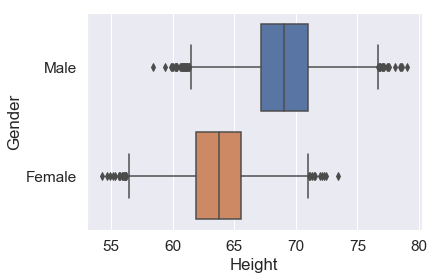

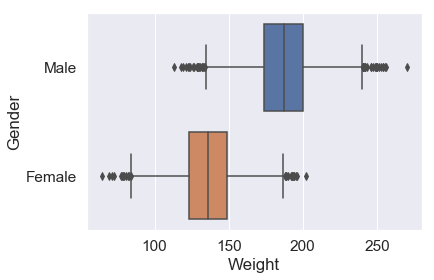

In [108]:
print(df.describe())

sns.boxplot(x='Height',y='Gender', data=df)
plt.show()


sns.boxplot(x='Weight',y='Gender', data=df)
plt.show()

Female    5000
Male      5000
Name: Gender, dtype: int64


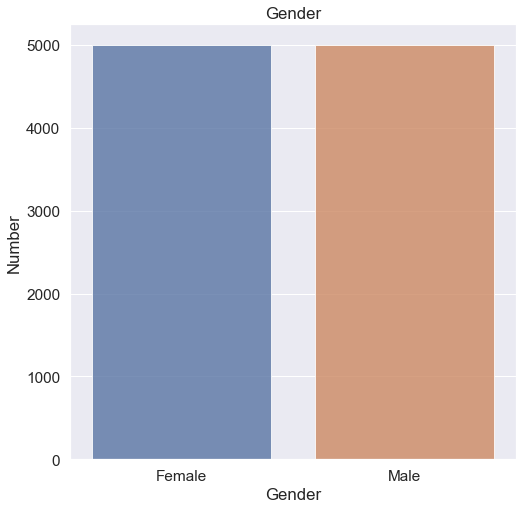

In [109]:
Gender=df['Gender'].value_counts()
print(Gender)
plt.figure(figsize=(8,8))
sns.barplot(Gender.index, Gender.values, alpha=0.8)
plt.title('Gender')
plt.ylabel('Number')
plt.xlabel('Gender')
plt.show()

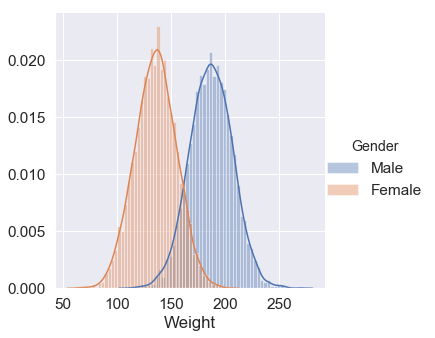

In [110]:
sns.FacetGrid(df, hue="Gender", size=5).map(sns.distplot,"Weight").add_legend();
plt.show();

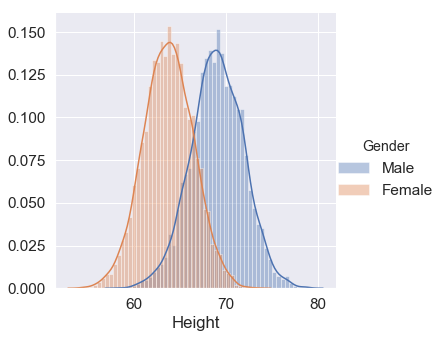

In [111]:
sns.FacetGrid(df, hue="Gender", size=5).map(sns.distplot,"Height").add_legend();
plt.show();

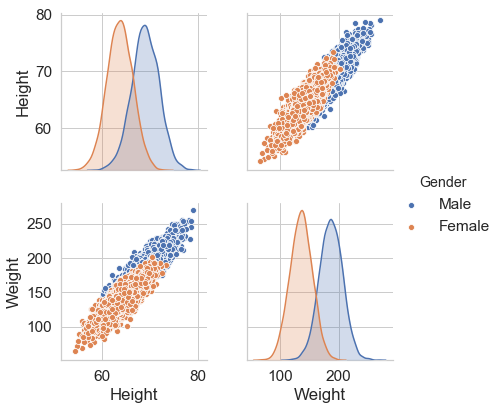

In [112]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Gender", size=3);
plt.show()

## Machine Learning Models

In [113]:
y=df['Gender']
df.drop(['Gender'],axis=1,inplace=True)

def labelEncoded(Y):
    encoder = LabelEncoder()
    encoder.fit(Y)
    encoded_Y = encoder.transform(Y)
    return encoded_Y

y=labelEncoded(y)

In [114]:
train,test,y_train,y_test=train_test_split(df,y,stratify=y,test_size=0.2)

In [115]:
print(train.shape,test.shape,y_train.shape,y_test.shape)

(8000, 2) (2000, 2) (8000,) (2000,)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.3s finished


Best HyperParameter:  {'C': 0.01}
0.9191171094876515


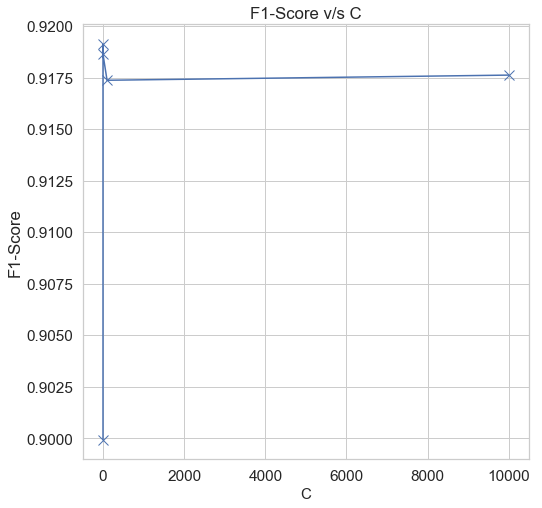

In [116]:
LR = LogisticRegression(penalty='l1')
C_value=[10**-4, 10**-2, 10**0, 10**2, 10**4]
C = [{'C': C_value}]
gsv = GridSearchCV(LR,C,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)

plt.xlabel("C",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s C')
plt.plot(C_value,x,marker='x',markerfacecolor='red',markersize=10)
plt.show()

Accuracy on test set: 91.850%
Precision on test set: 0.919
Recall on test set: 0.919
F1-Score on test set: 0.918


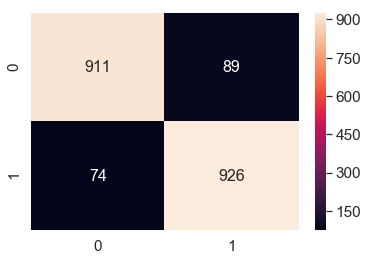

In [117]:
LR= LogisticRegression(penalty='l1',C=0.01)
LR.fit(train,y_train)
y_pred =LR.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:  1.9min finished


Best HyperParameter:  {'C': 0.1}
0.918746169251439


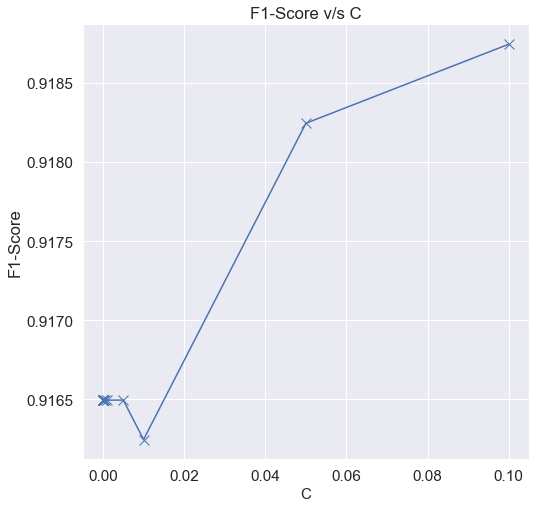

In [89]:
LR = SVC()
C_value=[0.0000001,0.0000005,0.000001,0.000005,0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
C = [{'C': C_value}]
gsv = GridSearchCV(LR,C,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
optimal_alpha=gsv.best_params_['C']


x=[]
plt.figure(figsize=(8,8))
for a in gsv.cv_results_['mean_test_score']:
    x.append(a)

plt.xlabel("C",fontsize=15)
plt.ylabel("F1-Score")
plt.title('F1-Score v/s C')
plt.plot(C_value,x,marker='x',markerfacecolor='red',markersize=10)
plt.show()

Accuracy on test set: 91.550%
Precision on test set: 0.916
Recall on test set: 0.915
F1-Score on test set: 0.915


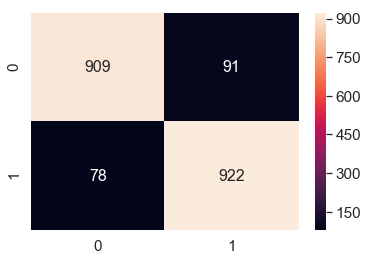

In [118]:
SV= SVC(C=0.1)
SV.fit(train,y_train)
y_pred =SV.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed:   42.3s finished


Best HyperParameter:  {'max_depth': 5, 'n_estimators': 12}
0.917869868904332


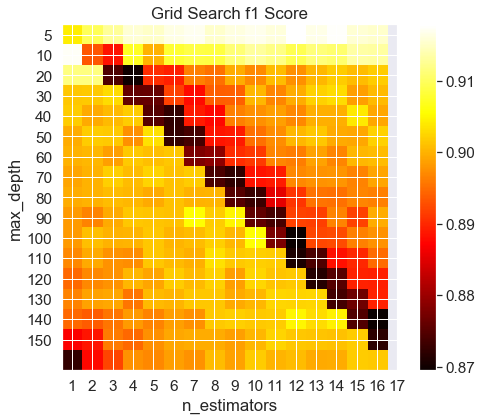

In [101]:
nEstimator = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
depth = [5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

RF = RandomForestClassifier()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='f1_weighted',n_jobs=-1)
gsv.fit(train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search f1 Score')
plt.show()

Accuracy on test set: 91.800%
Precision on test set: 0.918
Recall on test set: 0.918
F1-Score on test set: 0.918


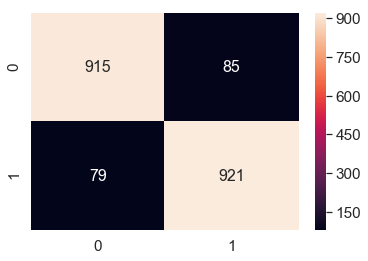

In [119]:

RF= RandomForestClassifier(n_estimators=12,max_depth=5)
RF.fit(train,y_train)
y_pred =RF.predict(test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred,average='macro')))
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred,average='macro')))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred,average='macro')))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

|Models|Accuracy|F1-Score|
|------|--------|--------|
|Logistic Regression|92.200%|0.922|
|SVM|91.650%|0.916|
|RF|91.250%|0.918|